# Introducing the Dataset

In this assignment I will be analysing the `flights` dataset in the `nycflights13` package. The `nycflights13` package contains airline data for all flights that departed from New York City Airports which are Kennedy International Airport (JFK), Newark Liberty International Airport (EWR) and LaGuardia Airport (LGA). Additionally, the package only contains information about flights that departed NYC in 2013 to cities in the United States, Puerto Rico, and the American Virgin Islands.

Here is a list of the metadata or data tables that the `nycflights13` package contains:
*   `?flights`: contains data on all the flights that departed from NYU in 2013 to destinations in the US, Puerto Rico, and the American Virgin Islands
*   `?weather`: contains data on the hourly meterological data for each NYC airport
*   `?planes`: contains data about the construction information about each plane
*   `?airports`: contains data about each airport (both, departure and arrival airports) name and location
*   `?airlines`: contains data about the translation between the airline carrier codes and their namesnd nameses

## Data Exploration/Exploratory Data Analysis 

I am loading the necessary libraries needed to analyse the `flights` data. I am also getting a brief overview of the dataset using the `?` help operator (the `help()` function can also be used). Both, the the `?` help operator and `help()` function provide access to the documentation pages for R functions, data sets, objects, and packages/contributed packages in the standard R distribution. 

Here are different ways to use the `help()` function:
*   You can access help for a function in a package before loading the package. To do this you just need to specify the function and package that you want more information about in the `help()` function. Ex. `help(rlm, package="MASS")`
*   When a name of a function or package in R is non-standard (i.e. starting with symbols, special characters, or numbers) then you need to put quotes around that name. Ex. `help('?')` or `?"?"`
*   You can also access information about a package in your library and don't always have to specify a specifc function
*   Some help pages for functions usually include a section of examples which illustrate how the function works. You can execute these examples using the `example()` command. Ex. `example(lm)`

In [35]:
#Installing necessary packages
#install.packages('gridExtra')

In [106]:
# Loading the libraries
library(nycflights13) #loading this package to access the `flights` dataset
library(tidyverse) #loading the tidyverse library (used for data wrangling, tidying, reading/writing, parsing, and visualisation)
library(gridExtra)
## can use `?flights` or `help(flights)` to get general information about the `flights` dataset
#?flights
help(flights)

flights {nycflights13},R Documentation


In [219]:
head(flights,3) #loading the dataset and printing the first 5 rows

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00


## Data Exploration/Exploratory Data Analysis Continued

I am investigating each dataset in the `nycflights13` package to double-check and see whether each dataset contains information about all departure and arrival airports/flights or just information about the NYC JFK, EWR, LGA airports.

In [4]:
print('Double checking to see if the `flights` dataset only includes 3 NYC airports (EWR, LGA, JFK) for departures')
unique(flights$origin)
#unique(flights$dest)

print('Checking to see if the `weather` dataset only includes hourly meterological data for each NYC airport')
unique(weather$origin)

print('After looking at the all the unique values in the `name` column of the `airport` dataset I realised that there was a long list of airport names
      which made me realise that the `airport` dataset includes information about arrival airports. To figure out whether the information of the
      3 NYC departure airports (JFK, EWR, LGA) are included I used the `grep()` function')
#unique(airports$name)
## Checking for Kennedy International Airport (JFK)
airports[grep("Kennedy", airports$name), 'name']
## Checking for Newark Liberty International Airport (EWR)
airports[grep("Liberty", airports$name), 'name']
## Checking for LaGuardia Airport (LGA)
airports[grep("Guardia", airports$name), 'name']

[1] "Double checking to see if the `flights` dataset only includes 3 NYC airports (EWR, LGA, JFK) for departures"


[1] "EWR" "LGA" "JFK"

[1] "Checking to see if the `weather` dataset only includes hourly meterological data for each NYC airport"


[1] "EWR" "JFK" "LGA"

[1] "After looking at the all the unique values in the `name` column of the `airport` dataset I realised that there was a long list of airport names\n      which made me realise that the `airport` dataset includes information about arrival airports. To figure out whether the information of the\n      3 NYC departure airports (JFK, EWR, LGA) are included I used the `grep()` function"


name
John F Kennedy Intl


name
Newark Liberty Intl


name
La Guardia


# Question 1: 
Create a object called `not_cancelled` which only contains information of flights that were not cancelled. Then, display the averages of all delayed flights (positive and negative values) and the average of all flights that were delayed. How does the `not_cancelled` object simplify our code? Think about the functions we used within `summarise()`.

## Removing Cancelled Flights

The first step is to create a object `not_cancelled` that filters out all of the cancelled flights in the `flights` dataset. 

### How do I determine what is a cancelled flight?

To identify cancelled flights I am going to use the `dep_delay` and `arr_delay` columns. If there is a `NA` value in one of these columns that would mean the flight is cancelled. `NA` values in the `dep_delay` and `arr_delay` columns represent cancelled flights because if a flight does not have a departure time then that means it never was scheduled for departure. Likewise, for the `arr_delay` column there were some flights that has a departure delay, but there was a `NA` arrival delay value which meant that the flight was eventually cancelled since it never landed. 

Alternitivly, I could just filter out all the `NA` values in the `arr_delay` column and get all the non-cancelled flights since the `NA` values in the `arr_delay` column will include rows that have `NA` values in both  `dep_delay` and `arr_delay` and in the `arr_delay` column alone.

### How does the not_cancelled object simplify our code?

I creating the `not_cancelled` object because the visualisations that I am going to create will analyse/display data about non-cancelled flights. The `not_cancelled` object will reduce the amount of code that I need to write for each visualisation that I create. For example, if you look at the code where I create the average delay column you can see that I reference the `not_cancelled` object instead of the `flights` object since I don't have to re-use the `filter()` function. 

In [218]:
# Here is the object 'not_cancelled' being created
not_cancelled <- flights %>% 
  filter(.,!is.na(dep_delay) & !is.na(arr_delay)) # filtering delayed flights because we want to see non-cancelled flights

# Showing average delays. avg_delay2 shows average for delayed flights only
not_cancelled %>% 
  group_by(.,year, month, day) %>% 
  summarize(.,
            avg_delay1 = mean(arr_delay),
            avg_delay2 = mean(arr_delay[arr_delay > 0]) # the ave positive delay
  ) %>%
  head(., 5)

year,month,day,avg_delay1,avg_delay2
2013,1,1,12.651023,32.48156
2013,1,2,12.692888,32.02991
2013,1,3,5.733333,27.66087
2013,1,4,-1.932819,28.30976
2013,1,5,-1.525802,22.55882


## Data Exploration/Exploratory Data Analysis: Double-checking row count

I am checking to see if I am correctly filtering the `NA` values in the `dep_delay` and `arr_delay` columns to represent the correct number of non-cancelled flights.

In [58]:
#I am checking to see if there are NA values in the `arr_delay` only, but not the `dep_delay` column
print('Value 1: Here are the number of rows that do not have NA values in the `dep_delay` column')
nrow(filter(flights ,!is.na(dep_delay)))

print('Value 2: Here are the number of rows that do not have NA values in the `dep_delay` and have NA values in the `arr_delay` column')
nrow(filter(flights ,!is.na(dep_delay) & is.na(arr_delay)))

print('I am subtracting the number of rows from the 1st value with the 2nd value.')
print('As you can see this value matches the number of rows that do not have values in both, the `dep_delay` and `arr_delay` columns')
nrow(filter(flights ,!is.na(dep_delay))) - nrow(filter(flights ,!is.na(dep_delay) & is.na(arr_delay)))

#I am checking to see if only removing rows that have NA values from the `arr_delay` columns would be the same as removing it from both, `dep_delay` and `arr_delay`
print('Here are the number of rows that do not have NA values in the `arr_delay` column')
nrow(filter(flights ,!is.na(arr_delay)))

print('Here are the number of rows that do not have NA values in the `dep_delay` and `arr_delay` columns (the total number of non cancelled flights)')
nrow(filter(flights ,!is.na(dep_delay) & !is.na(arr_delay)))

[1] "Value 1: Here are the number of rows that do not have NA values in the `dep_delay` column"


[1] 328521

[1] "Value 2: Here are the number of rows that do not have NA values in the `dep_delay` and have NA values in the `arr_delay` column"


[1] 1175

[1] "I am subtracting the number of rows from the 1st value with the 2nd value."
[1] "As you can see this value matches the number of rows that do not have values in both, the `dep_delay` and `arr_delay` columns"


[1] 327346

[1] "Here are the number of rows that do not have NA values in the `arr_delay` column"


[1] 327346

[1] "Here are the number of rows that do not have NA values in the `dep_delay` and `arr_delay` columns (the total number of non cancelled flights)"


[1] 327346

# Question 2
You might suspect that there is a relationship between the average delay (on a given day) and the proportion of flights that are cancelled on that day. For example, if there is bad weather, many flights might start off delayed, but then end up cancelled. Let’s test this intuition. First, find the average delay and proportion of flights cancelled each day. Second, plot them against one another and comment on the relationship. Did our intuition hold?

## Caclulating the average departure delay for each day (graph x-axis)

To calculate the average departure delay I would need to calculate the mean of the `dep_delay` column. But before I do that I would need to use the `group_by()` function to group the data by each day. 

## Calculating the proportion of cancelled flights (graph y-axis)

To calculate the proportion of cancelled flights I need to first use the `mutate()` function to create a column, `cancelled`, that has binary values of 1 and 0. The 1 will represent cancelled flights (when `dep_delay` or `arr_delay` have `NA` values) and 0 will represent non-cancelled flights (when `dep_delay` and `arr_delay` do not have `NA` values). I will then use the `summarize()` function to calculate the proportion of cancelled flights by calculating the mean of the `cancelled` column

**Note:** I am using the `flights` dataset here instead of `not_cancelled` because I need to find the proportion of cancelled flights and the `not_cancelled` dataset does not include information about cancelled flights.

## Graph Analysis and Answer

There is a relationship between the average flight delay (on a given day) and the proportion of flights that are cancelled on that day. If you look at both Graphs (the 1st and 2nd) you can see that as the average delay time of a flight increases then the percentage of the flight being cancelled increases. Graph 1 fliters the values of proportion of cancelled flights that are lower than 10. I created this graph so I can see a better distribution of the relationship between average delayed flights and proportion of cancelled flights. 

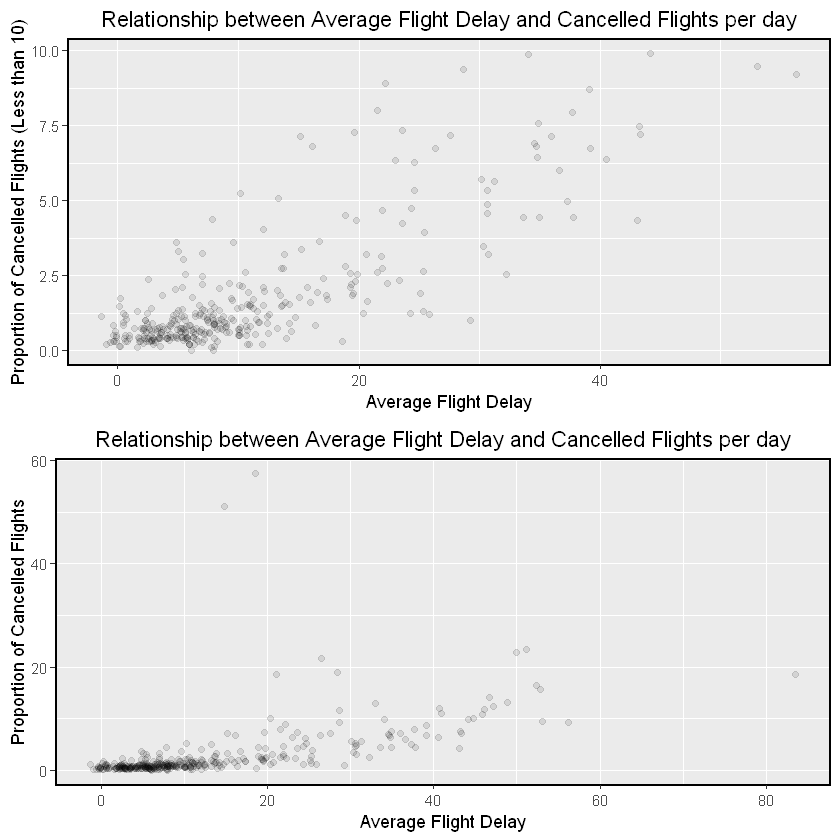

In [40]:

#avg delays and proportion of flights cancelled

graph_1 <- flights %>%
  group_by(.,year, month, day) %>% 
  mutate(cancelled = ifelse((is.na(dep_delay) | is.na(arr_delay)),1,0)) %>%
  summarize(.,
            avg_delay1 = mean(dep_delay,na.rm=TRUE),
            flights_proportion = 100*mean(cancelled)) %>%
  filter(flights_proportion < 10) %>%
  ggplot(mapping = aes(x = avg_delay1, y = flights_proportion)) + 
  geom_point(alpha=1/10)+
  labs(x= "Average Flight Delay", y = "Proportion of Cancelled Flights (Less than 10)")+
  ggtitle("Relationship between Average Flight Delay and Cancelled Flights per day")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

##avg delays and proportion of flights cancelled without filter function

graph_2 <- flights %>%
  group_by(.,year, month, day) %>% 
  mutate(cancelled = ifelse((is.na(dep_delay) | is.na(arr_delay)),1,0)) %>%
  summarize(.,
            avg_delay1 = mean(dep_delay,na.rm=TRUE),
            flights_proportion = 100*mean(cancelled)) %>%
  ggplot(mapping = aes(x = avg_delay1, y = flights_proportion)) + 
  geom_point(alpha=1/10)+
  labs(x= "Average Flight Delay", y = "Proportion of Cancelled Flights")+
  ggtitle("Relationship between Average Flight Delay and Cancelled Flights per day")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

grid.arrange(graph_1, graph_2, nrow=2) #using the `arrange` function in the `gridExtra` package to organise the graphs and make them easier to analyse.

# Question 3
No one likes to be delayed when flying. To try and avoid this, you might wonder what hour of the day is least likely to have a departure delay. What hour is it? Also, compute the percentage of flights that leave on time or early in each hour (i.e., the flights you want to find!). What hour of the day are you most likely to find these flights?

## Grouping by hour and creating early flight proportions

To find out what hour of the day has the highest proportion of on-time flights I need to use the `group_by()` function and categorize the departure delay values by hour. I would then use the `mutate()` function to create a column of binary values that would assign a 1 to early or on-time flights (flights that have a departure delay <= 0) and assign a zero to late flights (flights that have a departure delay > 0). To calculate the proportion, I would use the `summarize()` function to find the mean of all on-time flights per hour and would then convert that value to a percentage by multiplying it by 100

## What hour of the day will least likely have a departure delay?

Flights departing from 5-10 AM will have a high change (70% or higher) of departing early or on-time.

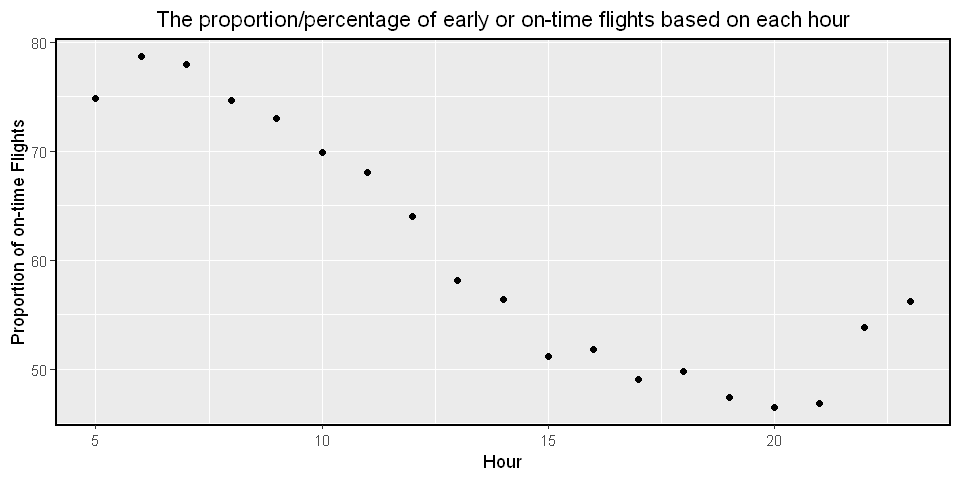

In [72]:
# code for scatterplot of early flight proportion for each hour
graph_3 <- not_cancelled %>%
  mutate(flight_early = ifelse((dep_delay <= 0),1,0)) %>%
  group_by(.,hour) %>% 
  summarize(.,
            ontime_proportion = 100*mean(flight_early)) %>%
  ggplot(mapping = aes(x = hour, y = ontime_proportion)) + 
  geom_point()+
  labs(x= "Hour", y = "Proportion of on-time Flights")+
  ggtitle("The proportion/percentage of early or on-time flights based on each hour")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

options(repr.plot.width = 8, repr.plot.height =4) #re-sizing the graph so it can be easier to read
graph_3


# Question 4
Which carriers are most likely to have a departure delay of at least 30 minutes?

## Answer
ExpressJet (EV) is the airline that will most likely have a departure delay for 30 minutes or more with a proportion of roughly 26%. Mesa Airlines (YV) comes in second with a proportion of roughly 23%. I reached this conclusion from the scatterplot and bar plot below.

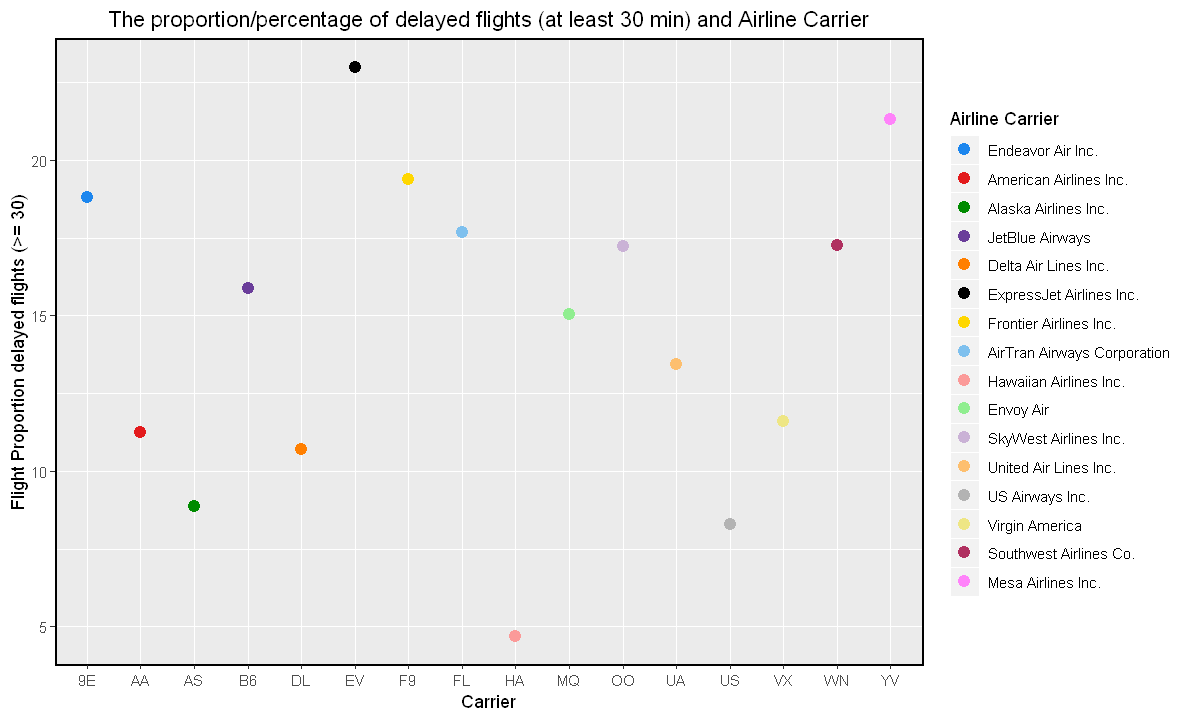

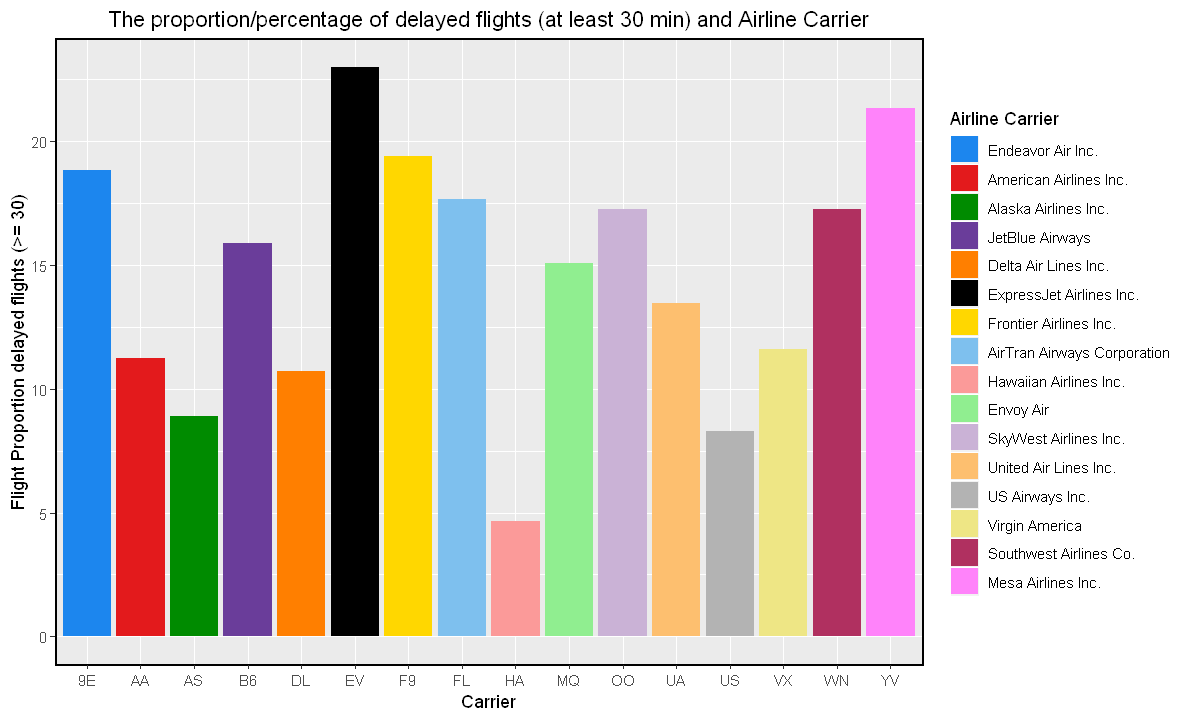

In [130]:
c16 <- c("dodgerblue2", "#E31A1C", # red
         "green4", "#6A3D9A", # purple
         "#FF7F00", # orange
         "black", "gold1", "skyblue2", "#FB9A99", # lt pink
         "palegreen2", "#CAB2D6", # lt purple
         "#FDBF6F", # lt orange
         "gray70", "khaki2", "maroon", "orchid1")

graph_4_scatter <- not_cancelled %>%
  mutate(dep_delay_30_min = ifelse((dep_delay >= 30),1,0)) %>%
  group_by(.,carrier) %>% 
  summarize(.,
            dep_delay_30_min_proportion = 100*mean(dep_delay_30_min)) %>%
  ggplot(mapping = aes(x = carrier, y = dep_delay_30_min_proportion, color = carrier)) + 
  geom_point(size=3)+ #`size=` defines the point size
  labs(x= "Carrier", y = "Flight Proportion delayed flights (>= 30)")+
  ggtitle("The proportion/percentage of delayed flights (at least 30 min) and Airline Carrier")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       ) +
  scale_color_manual(name="Airline Carrier",
                    labels= airlines$name, #automatically creating the labels by using the column values in the `airline` dataset (NOTE: the order of the airlines in the legend matched the column order which is why I used it)
                      values = c16 #assigning the color pallete (16 colors because of 16 values in the legend)
                    )

graph_4_bar <- not_cancelled %>%
  mutate(dep_delay_30_min = ifelse((dep_delay >= 30),1,0)) %>%
  group_by(.,carrier) %>% 
  summarize(.,
            dep_delay_30_min_proportion = 100*mean(dep_delay_30_min)) %>%
  ggplot(mapping = aes(x = carrier, y = dep_delay_30_min_proportion, fill = carrier)) + 
  geom_bar(stat = "identity")+ #`stat = identity` tells `geom_bar()` that I will provide the y-axis values and that it does not need to aggregate the `y-axis` values automatically
  labs(x= "Carrier", y = "Flight Proportion delayed flights (>= 30)")+
  ggtitle("The proportion/percentage of delayed flights (at least 30 min) and Airline Carrier")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       ) +
  scale_fill_manual(name="Airline Carrier",
                    labels= airlines$name, #automatically creating the labels by using the column values in the `airline` dataset (NOTE: the order of the airlines in the legend matched the column order which is why I used it)
                      values = c16 #assigning the color pallete (16 colors because of 16 values in the legend)
                    )

options(repr.plot.width = 10, repr.plot.height =6) #re-sizing the graph so it can be easier to read
graph_4_scatter
graph_4_bar

# Question 5
What destination has the smallest average arrival delay?

## Answer

Lexington (LEX) has the smallest average arrival delay with an average of -22. I figured out this answer in two ways. I first viewed the dataset output of the minimum average delay for each destination using the `group_by()` and `summarize()` functions. I then used the `filter()` function to display the row that has the lowest average arrival delay. The second method was to create a scatter plot where I plot the average arrival delay for each destination. I used the `filter()` function to display average flight delays that are less than 0 because the x-axis could not be read if I displayed the average arrival delay for all destinations. The `filter()` function helped me condense my scatterplot and make it more visible/easier to read.

dest,arrivaldelay_average
LEX,-22


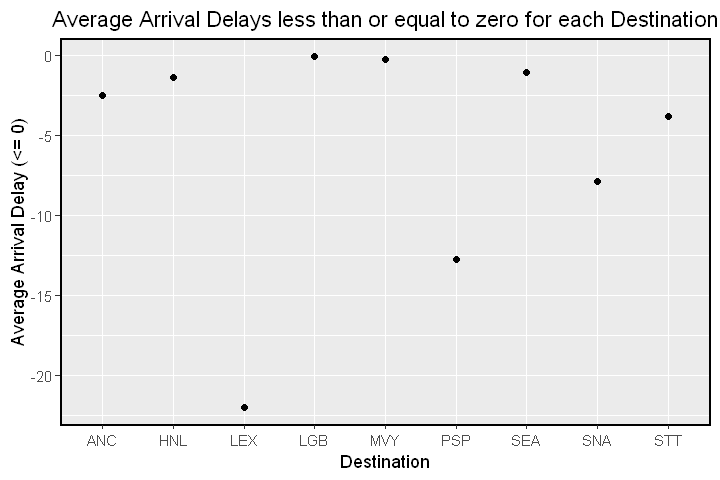

In [166]:
# printing the row that gives me the destination that has the smallest arrival delay
not_cancelled %>%
  group_by(.,dest) %>%
  summarize(.,
            arrivaldelay_average = mean(arr_delay)) %>%
  filter(arrivaldelay_average == min(arrivaldelay_average)) #using the `filter()` function to show me the destination that has the lowest arrival delay average

# The code I had first. I noticted the graph was too big so I added 
# the filter function to get the value of the smallest average
graph_5 <- not_cancelled %>%
  group_by(.,dest) %>%
  summarize(.,
            arrivaldelay_average = mean(arr_delay)) %>%
  filter(., arrivaldelay_average <= 0) %>%
  ggplot(mapping = aes(x = dest, y = arrivaldelay_average)) + 
  geom_point() +
  labs(x= "Destination", y = "Average Arrival Delay (<= 0)")+
  ggtitle("Average Arrival Delays less than or equal to zero for each Destination")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

options(repr.plot.width = 6, repr.plot.height =4)
graph_5

# Question 6 (BONUS)

## 6a.
Load the Lahman() library, which contains data on baseball players and their batting averages. First, convert it to a tibble (the tidyverse data structure we’ll cover in a future lecture) by calling: batting <- as_tibble(Lahman::Batting).
## 6b.
Then find the players with the best or worst batting averages (batting average is simply the number of hits a player has, divided by the number of at bats they have). Why would this lead you astray

## 6c.
Now condition on players who had at least 500 at bats. How would you answer change? ? 


## Answer to Question 6a

In [221]:
#loading the `Lahman()` library and am uploading the `Batting` dataset from the `Lahman()` library
library(Lahman)
batting <- as_tibble(Lahman::Batting)

?Batting #I am loading the `Batting` helpfile to learn more about the dataset

Batting {Lahman},R Documentation


## Answer to Question 6b

When graphing this data, it would be impossible to see which players have the best and worst batting averages for 2 main reasons:
1.	All the players have many batting averages, and this fills up the scatterplot making it impossible to even filter out the best or worst batting average. 
2.	There would be many players in the x-axis so it would be hard to see the name of all players. This can easily be fixed by adding a filter function to only show the graph of the best and worst players.
 
I used the `group_by` function to separate each player through their ID. This way I can calculate the batting average for each player. I then use the `summarize()` function to define a variable `batting_average` which gets the number of hits a player has (`H`) and divides that by the number of bates they have (`AB`). 

Since the variable `player ID` is a categorical variable and `batting_average` is a continuous variable, I am using a scatter plot to display my data.

Warning message:
"Removed 2466 rows containing missing values (geom_point)."

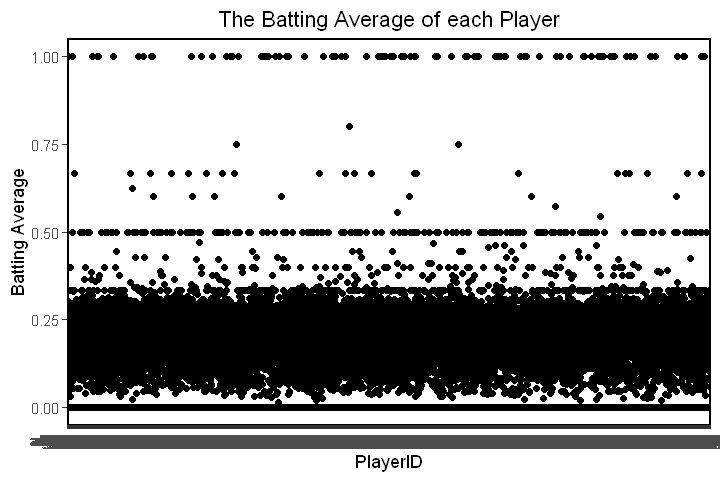

In [188]:
# Batting Average of all players
batting %>% 
  filter(., !is.na(H) | !is.na(AB)) %>%
  group_by(.,playerID) %>%
  summarize(.,
            batting_average = sum(H)/sum(AB)) %>%
  ggplot(mapping = aes(x = playerID, y = batting_average)) + 
  geom_point() +
  labs(x= "PlayerID", y = "Batting Average")+
  ggtitle("The Batting Average of each Player")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

## Answer to Question 6c

When I analysed the dataset further (specifically each players total amount of hits and batting averages) I realised that there were many players that had batted a couple of times and got a hit each time (or never hit at all), so the perfect averages of these players were skewing our data. To get a better sense of the average that represents the whole population (at-bat sample size) I needed to only include players who batted many times. Filtering the results of each player to only include players who had a total batting score greater than 500 allowed me to see some points in my scatterplot, although it is still filled, I can see more points clearly. I would still need to set further conditions if I would like to see the data more clearly or even make different objects that represent different datasets.  

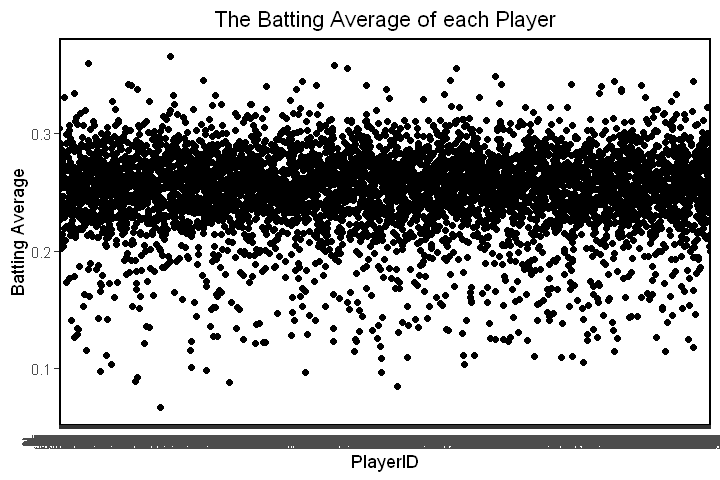

In [205]:
batting %>%  
  group_by(.,playerID) %>%
  summarize(.,
            AB_sum = sum(AB),
            batting_average = sum(H)/sum(AB)) %>%
  filter(AB_sum >= 500) %>%
  ggplot(mapping = aes(x = playerID, y = batting_average)) + 
  geom_point() +
  labs(x= "PlayerID", y = "Batting Average")+
  ggtitle("The Batting Average of each Player")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1) #putting the graph border
       )

In [215]:
batting %>%
  group_by(.,playerID) %>%
  summarize(.,
            H_sum = sum(H),
            AB_sum = sum(AB),
            batting_average = sum(H)/sum(AB)) %>%
  filter(., 2<= AB_sum & AB_sum < 5) %>%
  arrange(., AB_sum) 

playerID,H_sum,AB_sum,batting_average
abreuwi01,0,2,0.0
aceveal01,0,2,0.0
adamsau02,0,2,0.0
adamsjo01,0,2,0.0
adamsmi03,0,2,0.0
adonjo01,0,2,0.0
akinke01,0,2,0.0
alanirj01,1,2,0.5
alexaty01,0,2,0.0
alvarvi01,0,2,0.0
